# Regularization in Machine Learning

Regularization is a technique used to prevent overfitting in machine learning models by penalizing complex models. It involves adding a regularization term to the loss function to control the model's complexity.

## Types of Regularization

The two most common types of regularization are L1 (Lasso) regularization and L2 (Ridge) regularization.

### L1 Regularization (Lasso)

L1 regularization adds the sum of the absolute values of the coefficients to the loss function. It can lead to sparse models where some feature coefficients are zeroed out, effectively performing feature selection.

#### Formula

$$ \text{Loss Function} = \text{MSE} + \alpha \sum_{i=1}^{n} |w_i| $$

### L2 Regularization (Ridge)

L2 regularization adds the sum of the squares of the coefficients to the loss function. It doesn't zero out coefficients but ensures they are small, leading to a less complex model.

#### Formula

$$ \text{Loss Function} = \text{MSE} + \alpha \sum_{i=1}^{n} w_i^2 $$

### Elastic Net

Elastic Net is a combination of L1 and L2 regularization. It is useful when there are multiple correlated features.

#### Formula

$$ \text{Loss Function} = \text{MSE} + \alpha \rho \sum_{i=1}^{n} |w_i| + \alpha (1-\rho) \sum_{i=1}^{n} w_i^2 $$

## Choosing the Regularization Parameter

The regularization parameter ($\alpha$) controls the strength of the penalty. The L1 ratio ($\rho$) controls the combination of L1 and L2 penalties.

## Benefits of Regularization

- Reduces overfitting by penalizing large coefficients.
- Can lead to simpler models that generalize better.
- In the case of L1 regularization, can perform feature selection by zeroing out coefficients.

In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.datasets import make_regression, make_classification

In [2]:
# generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, random_state=0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [5]:
linear_preds = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_preds)

print(f'Linear MSE: {linear_mse}')

Linear MSE: 4.4963065918746146e-26


In [6]:
# initialize Ridge Regression model with regularization strength lambda (alpha)
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

Ridge()

In [7]:
ridge_preds = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_preds)

print(f'Ridge MSE: {ridge_mse}')

Ridge MSE: 0.0826756347545555


In [8]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

lasso_preds = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)

print(f'Lasso MSE: {lasso_mse}')

Lasso MSE: 0.09972349965638347


Logistic Regression model in `sklearn` already has regularization built-in. The default is `L2 (Ridge)`.

In [9]:
# generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
log_ridge_reg = LogisticRegression(C=1.0)
log_ridge_reg.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = log_ridge_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [13]:
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[ 90   3]
 [  4 103]]
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 Score: 0.97


In [14]:
log_lasso_reg = LogisticRegression(C=1.0, penalty='l1', solver='saga')
log_lasso_reg.fit(X_train, y_train)

/home/sawinu/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [15]:
y_pred = log_lasso_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [16]:
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[ 90   3]
 [  4 103]]
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 Score: 0.97


In [17]:
log_enet_reg = LogisticRegression(penalty='elasticnet', solver='saga', C=1, l1_ratio=0.5)
log_enet_reg.fit(X_train, y_train)

/home/sawinu/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [18]:
y_pred = log_enet_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [19]:
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[ 90   3]
 [  4 103]]
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 Score: 0.97


# Hyperparameter Tuning, Cross-Validation, and Grid Search

The regularization parameter ($\alpha$) and L1 ratio ($\rho$) are examples of **hyperparameters**. In machine learning, models have parameters that are learned from the data and hyperparameters that are set by the practitioner. Hyperparameter tuning is the process of finding the optimal combination of hyperparameters that yields the best performance. Cross-validation and grid search are two techniques used for this purpose.

## Cross-Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. Cross-validation involves partitioning the data into subsets, training the model on some subsets, and validating it on the remaining subsets. This process is repeated multiple times, and the results are averaged to estimate the model's performance. 

The goal is to assess how the predictions of a model will generalize to an independent dataset, which is identical to the purpose of train-test split which we have been doing thus far.

The train-test split is a simple method to divide your dataset into two parts: one for training the model and the other for testing it. However it has the following disadvantages if we use it for hyperparamters tuning:

- The evaluation may depend on how the data is split.
- The test score can vary significantly based on which data points end up in the training set and which in the test set.
- Less effective use of data, especially in cases where the amount of training data is limited.

Cross-validation has the following advantages when it comes to hyperparameters tuning:

- More reliable estimate of out-of-sample performance due to multiple rounds of splitting.
- Makes better use of data as each data point gets to be in a test set exactly once and in a training set K-1 times.

### Types of Cross-Validation

![kfoldcv](../assets/kfold-cv.png)
- **K-Fold Cross-Validation**: The dataset is divided into K equal folds. Each fold acts as the validation set 1 time and acts as the training set K-1 times. The average performance metric across all K trials is used.
- **Leave-One-Out Cross-Validation**: A special case of K-Fold Cross-Validation where K is equal to the number of data points in the dataset.
- **Stratified K-Fold Cross-Validation**: Similar to K-Fold but preserves the percentage of samples for each class.

## Grid Search
![grid-random-search](../assets/grid-random-search.png)

Grid search is a brute force method to estimate the best hyperparameters. A grid of hyperparameter combinations is created, and the model is evaluated for each combination using cross-validation.

### Process

1. Define the hyperparameter grid.
2. Use cross-validation to evaluate each combination of hyperparameters.
3. Select the combination that yields the best performance.

## Random Search

Random search is an alternative to grid search. Instead of trying out every possible combination, it samples a random subset of parameter combinations.

### Advantages

- Can be faster than grid search when dealing with a large hyperparameter space.
- Can sometimes find a better combination of hyperparameters by exploring a wider range of values.

### Process

1. Define a search space as a bounded domain of hyperparameter values.
2. Randomly sample combinations of hyperparameters from this domain.
3. Perform cross-validation for each combination.
4. Select the combination that yields the best validation score.

## Model Training Workflow

The end-to-end model training workflow goes like this:

1. After preprocessing of the data, train-test split is performed. The test set is kept for the final evaluation of the (hyperparameter-) tuned model.
2. A combination of hyperparameters' prospective values (usually a range or list) is determined. Then grid-search (or random search) is performed to determine the best possible combination candidate by using cross-validation to evaluate each candidate.
3. The whole training set is used to train the model with the best candidate combination of hyperparameters found from the previous step. This model is called the (hyperparameter-) tuned model.
4. Evaluate the tuned model on the test set.

Let's perform the workflow on a regularized `Logistic Regression` model on the `titanic` dataset.

In [20]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [21]:
titanic = sns.load_dataset('titanic')
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

X = titanic[features]
y = titanic[target]

In [22]:
# preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['age', 'sibsp', 'parch', 'fare']),
        ('cat', categorical_transformer, ['pclass', 'sex', 'embarked'])
    ])

# define the model
model = LogisticRegression(penalty='elasticnet', solver='saga')

# define the hyperparameter grid
param_grid = {
    'C': [0.05, 0.1, 0.15, 0.2],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1.0],
}

# initialize GridSearchCV with the model, parameter grid, cross-validation strategy, and scoring metrics
# here we use f1 score as the metrics
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')

# create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('grid_search', grid_search)
                          ])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .................................C=0.05, l1_ratio=0; total time=   0.0s
[CV] END .................................C=0.05, l1_ratio=0; total time=   0.0s
[CV] END ..............................C=0.05, l1_ratio=0.25; total time=   0.0s
[CV] END ..............................C=0.05, l1_ratio=0.25; total time=   0.0s
[CV] END ..............................C=0.05, l1_ratio=0.25; total time=   0.0s
[CV] END .................................C=0.05, l1_ratio=0; total time=   0.0s
[CV] END ...............................C=0.05, l1_ratio=0.5; total time=   0.0s
[CV] END .................................C=0.05, l1_ratio=0; total time=   0.0s
[CV] END ..............................C=0.05, l1_ratio=0.25; total time=   0.1s
[CV] END .................................C=0.05, l1_ratio=0; total time=   0.0s
[CV] END ...............................C=0.05, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................C=0.05, 

/home/sawinu/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sawinu/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sawinu/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sawinu/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sawinu/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sawinu/minicon

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex',
                                                   'embarked'])])),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(penalty='elasticnet',
                                                           solver='saga'),
                              n_jobs=-1,
                              param_grid={'C': [0.05, 0.1, 0.15, 0.2],
                                          'l1_ratio': [0, 0.25, 0.5, 0.75,
                                                       1.0]},
                              scoring='f1', verbose=2))])

In [24]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.4f}")

Best Parameters: {'C': 0.05, 'l1_ratio': 0}
Best Score: 0.7304


In [25]:
list(zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']))

[({'C': 0.05, 'l1_ratio': 0}, 0.730435877443761),
 ({'C': 0.05, 'l1_ratio': 0.25}, 0.7235263118758264),
 ({'C': 0.05, 'l1_ratio': 0.5}, 0.7190841792874277),
 ({'C': 0.05, 'l1_ratio': 0.75}, 0.7046556679985212),
 ({'C': 0.05, 'l1_ratio': 1.0}, 0.70865096096225),
 ({'C': 0.1, 'l1_ratio': 0}, 0.7233268233512049),
 ({'C': 0.1, 'l1_ratio': 0.25}, 0.7278184801428662),
 ({'C': 0.1, 'l1_ratio': 0.5}, 0.7181125781333633),
 ({'C': 0.1, 'l1_ratio': 0.75}, 0.717798826170872),
 ({'C': 0.1, 'l1_ratio': 1.0}, 0.7165292219886464),
 ({'C': 0.15, 'l1_ratio': 0}, 0.7240515583534956),
 ({'C': 0.15, 'l1_ratio': 0.25}, 0.724163307279177),
 ({'C': 0.15, 'l1_ratio': 0.5}, 0.7212954749011656),
 ({'C': 0.15, 'l1_ratio': 0.75}, 0.7190109473829932),
 ({'C': 0.15, 'l1_ratio': 1.0}, 0.7215808080166874),
 ({'C': 0.2, 'l1_ratio': 0}, 0.7227446128717927),
 ({'C': 0.2, 'l1_ratio': 0.25}, 0.721574310515423),
 ({'C': 0.2, 'l1_ratio': 0.5}, 0.7225518925518926),
 ({'C': 0.2, 'l1_ratio': 0.75}, 0.7212954749011656),
 ({'C': 

In [26]:
preds = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

In [27]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"AUC: {roc_auc:.2f}")

Accuracy: 0.79
Precision: 0.75
Recall: 0.70
F1 Score: 0.72
AUC: 0.87


# Decision Trees

Decision trees are a popular machine learning algorithm used for both classification and regression tasks. They are easy to understand, visualize, and implement. They are also the base model used for more advanced algorithms like random forest and gradient boosting.

## What is a Decision Tree?

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a tree is known as the root node.

![decision-tree](../assets/decision-tree.png)

## How Does a Decision Tree Work?

A decision tree splits the data into subsets based on the value of input features. This process is repeated recursively, resulting in a tree with decision nodes and leaf nodes.

### Decision Node

A decision node has two or more branches, each representing values for the attribute tested.

### Leaf Node

A leaf node represents a class label (in classification) or a continuous value (in regression).

## Building a Decision Tree

To build a decision tree, algorithms like ID3, C4.5, C5.0, and CART (Classification and Regression Trees) can be used. The most common algorithm used in `sklearn` is CART, which uses the **Gini impurity** or **entropy** as a criterion to create splits.

### Gini Impurity

Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

For a dataset with $ J $ classes, the Gini impurity of a node $ n $ is defined as:

$$ G(n) = 1 - \sum_{j=1}^{J} p_j^2 $$

where $ p_j $ is the fraction of items labeled with class $ j $ in the set.

- **Minimum (0)**: The Gini impurity is zero when all the samples in a node belong to a single class, indicating perfect purity.
- **Maximum ($1 - \frac{1}{J}$)**: The Gini impurity is maximized when the classes are evenly distributed across the node. For binary classification, this is when the classes are split 50/50 in a node, resulting in a Gini impurity of 0.5. For more classes, the maximum value decreases, reaching its theoretical maximum when each class has an equal probability.

![gini](../assets/gini.png)

### Entropy

Entropy is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information. In the context of decision trees, it's used to quantify the impurity or disorder after a dataset is split on an attribute.

For a dataset with $ J $ classes, the entropy of a node $ n $ is defined as:

$$ H(n) = -\sum_{j=1}^{J} p_j \log_2(p_j) $$

where $ p_j $ is the proportion of the samples that belong to class $ j $.

- **Minimum (0)**: Entropy is zero when all samples at a node belong to the same class, which means there is no uncertainty or randomness.
- **Maximum ($ \log_2(J) $)**: Entropy is maximized when there is an equal number of samples from each class in the node, indicating the highest level of disorder or uncertainty. For binary classification, the maximum entropy is 1 (since $ \log_2(2) = 1 $). As the number of classes increases, the maximum possible entropy increases logarithmically.

### Information Gain

Information gain is based on the decrease in entropy after a dataset is split on an attribute. It is used to decide which attribute to split on at each step in building the tree.

For a dataset $ D $, split into subsets $ \{D_1, D_2, ..., D_k\} $ using feature $ A $, the information gain $ IG $ is defined as:

$$ IG(D, A) = H(D) - \sum_{i=1}^{k} \frac{|D_i|}{|D|} H(D_i) $$

where:
- $ H(D) $ is the entropy of the entire dataset,
- $ |D_i|/|D| $ is the weight of the $ i $-th subset,
- $ H(D_i) $ is the entropy of the $ i $-th subset.

## Advantages of Decision Trees

- Simple to understand and interpret.
- Requires little data preprocessing.
- Can handle both numerical and categorical data.

## Disadvantages of Decision Trees

- Prone to overfitting, especially with a lot of features.
- Can be unstable because small variations in the data might result in a completely different tree.

## Pruning a Decision Tree

Pruning is a technique used to reduce the size of decision trees by removing sections of the tree that provide little power in classifying instances. It reduces the complexity of the final classifier, hence reducing the risk of overfitting.

Let's apply the Decision Tree workflow on titanic dataset. We can skip the preprocessing and train-test split steps are they are identical.

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# define the model
model = DecisionTreeClassifier(criterion='gini', random_state=0)

# define the hyperparameter grid
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8],
}

# initialize GridSearchCV with the model, parameter grid, cross-validation strategy, and scoring metrics
# here we use f1 score as the metrics
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')

# create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('grid_search', grid_search)
                          ])

In [30]:
pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6; total time=   0.0s
[CV

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex',
                                                   'embarked'])])),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(random_state=0),
                              n_jobs=-1,
                              param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                                          'min_samples_leaf': [2, 4, 6, 8],
                                          'min_samples_split': [2, 4, 6, 8]},
                              scoring='f1', verbose=2))])

In [31]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.4f}")

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best Score: 0.7463


In [32]:
preds = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

In [33]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"AUC: {roc_auc:.2f}")

Accuracy: 0.83
Precision: 0.87
Recall: 0.67
F1 Score: 0.75
AUC: 0.89


## Visualizing the Decision Tree (Additional section - Alvin 20250626)

Let's visualize the best decision tree model to better understand how it makes predictions.

In [34]:
from sklearn.tree import export_graphviz
import graphviz
import pandas as pd

In [35]:
# Extract the best decision tree model from the pipeline
best_tree = grid_search.best_estimator_

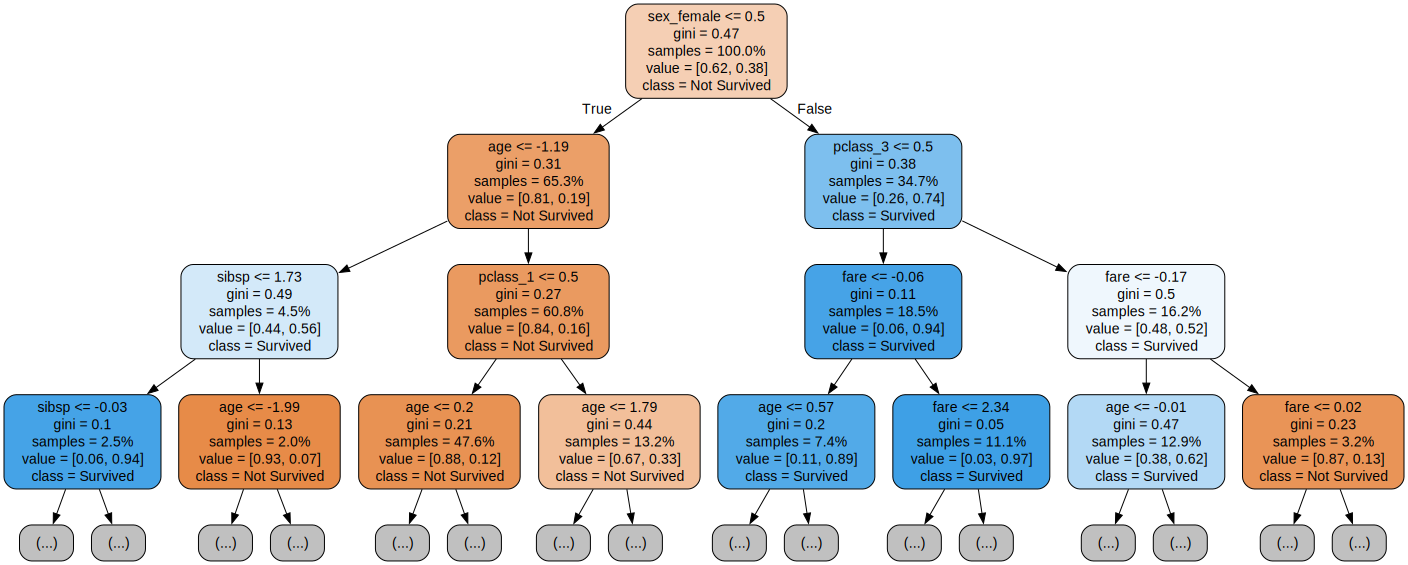

In [36]:
# Get feature names after preprocessing
# First, get the categorical feature names after one-hot encoding
cat_features = ['pclass', 'sex', 'embarked']
cat_transformer = preprocessor.named_transformers_['cat']
cat_encoder = cat_transformer.named_steps['onehot']
cat_feature_names = cat_encoder.get_feature_names_out(cat_features)

# Then, get the numerical feature names
num_features = ['age', 'sibsp', 'parch', 'fare']

# Combine all feature names
feature_names = list(num_features) + list(cat_feature_names)

# Export to DOT format
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=feature_names,
    class_names=["Not Survived", "Survived"],
    filled=True,
    rounded=True,
    max_depth=3,  # Limit depth for better visualization
    proportion=True,
    precision=2
)

# Create visualization
graph = graphviz.Source(dot_data, format="png")

# Display the visualization
graph

# Bagging vs Boosting, Random Forest, and Gradient Boosting

## Introduction

Ensemble learning is a powerful approach to improve the performance of machine learning models. It combines multiple models to produce a single predictive model. Two popular ensemble methods are bagging and boosting. This tutorial will explain the differences between them and introduce two specific algorithms: Random Forest and Gradient Boosting.

## Bagging

Bagging, or Bootstrap Aggregating, is an ensemble technique that aims to reduce the variance of a prediction model, such as decision trees. It involves training multiple models using different subsets of the training dataset.

### How Bagging Works

1. Create multiple subsets of the original dataset with replacement (bootstrapping).
2. Train a separate model on each subset.
3. Combine the predictions from all models, typically by averaging (regression) or voting (classification).

### Random Forest

Random Forest is an extension of bagging applied to decision trees. In addition to training on different subsets of data, it also uses a subset of features for each tree.

#### Advantages

- Reduces overfitting by averaging multiple trees.
- Handles large datasets with higher dimensionality well.
- Provides feature importance scores.

## Boosting

Boosting is an ensemble technique that aims to create a strong classifier from a number of weak classifiers. This is achieved by building a model from the training data, then creating a second model that tries to correct the errors from the first model.

### How Boosting Works

1. Train a model on the entire dataset.
2. Train subsequent models by focusing on examples that were misclassified by previous models.
3. Combine the predictions from all models, typically by weighted voting.

![bagging-boosting](../assets/bagging_boosting.png)

### Gradient Boosting

Gradient Boosting is a variant of boosting technique that uses gradient descent to minimize errors in sequential models. It builds one tree at a time, where each new tree helps to correct errors made by previously trained trees.

#### Advantages

- Often provides predictive accuracy that cannot be trumped.
- Lots of flexibility - can optimize on different loss functions and provides several hyperparameter tuning options that make the function fit very flexible.

## Comparison

- **Bagging** is parallel ensemble: each model is built independently.
- **Boosting** is sequential ensemble: each model is built sequentially by taking into account the performance of the previous model.
- **Random Forest** uses bagging with decision trees to reduce variance, providing a more reliable model.
- **Gradient Boosting** uses boosting with decision trees to reduce bias, often resulting in better performance.

Let's apply the Random Forest workflow on titanic dataset. We can skip the preprocessing and train-test split steps are they are identical.

In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [38]:
# define the model
model = RandomForestClassifier(random_state=0)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8],
}

# initialize GridSearchCV with the model, parameter grid, cross-validation strategy, and scoring metrics
# here we use f1 score as the metrics
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')

# create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('grid_search', grid_search)
                          ])

In [39]:
pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex',
                                                   'embarked'])])),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=0),
                              n_jobs=-1,
                              param_grid={'max_depth': [None, 2, 4, 6, 8],
                                          'min_samples_leaf': [2, 4, 6, 8],
                                          'min_samples_split': [2, 4, 6, 8],
                                          'n_estimators': [100, 200, 300, 400,
                                                           500]},
                              scoring='f1', verbose=2))])

In [40]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200}
Best Score: 0.7520


In [41]:
preds = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

In [42]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"AUC: {roc_auc:.2f}")

Accuracy: 0.84
Precision: 0.87
Recall: 0.68
F1 Score: 0.76
AUC: 0.90


> Now, repeat the pipeline for GradientBoostingClassifier

In [43]:
# define the model
model = GradientBoostingClassifier(random_state=0)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6],
}

# initialize GridSearchCV with the model, parameter grid, cross-validation strategy, and scoring metrics
# here we use f1 score as the metrics
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')

# create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('grid_search', grid_search)
                          ])

In [44]:
pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, min_samples_leaf=2, min_samples_split=2, n_estimators

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex',
                                                   'embarked'])])),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=GradientBoostingClassifier(random_state=0),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.01, 0.1, 0.2,
                                                            0.3],
                                          'min_samples_leaf': [2, 4, 6],
                                          'min_samples_split': [2, 4, 6],
                                          'n_estimators': [100, 200, 300, 400,
                                                           500],
                                          'subsample': [0.8, 0.9, 1.0]},
                              scoring='f1', verbose=2))])

In [45]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.4f}")

Best Parameters: {'learning_rate': 0.2, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 0.7689


In [46]:
preds = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

In [47]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"AUC: {roc_auc:.2f}")

Accuracy: 0.85
Precision: 0.86
Recall: 0.74
F1 Score: 0.80
AUC: 0.89


# LightGBM

LightGBM is a gradient boosting framework that uses tree-based learning algorithms and is designed for distributed and efficient training, particularly on large datasets. It stands for Light Gradient Boosting Machine and is developed by Microsoft. LightGBM is known for its speed and performance, as well as its ability to handle large-sized data and support GPU learning. It is currently one of the best Supervised Learning algorithms in terms of performance and speed for tabular (structural or dataframe-like) datasets.

## Key Features of LightGBM

- **Histogram-based Algorithms**: Instead of considering each value for each feature to find the optimal split, it buckets continuous feature values into discrete bins, which speeds up the training process.
- **Gradient-based One-Side Sampling (GOSS)**: Keeps all the instances with large gradients and performs random sampling on the instances with small gradients.
- **Exclusive Feature Bundling (EFB)**: Reduces the number of features by bundling mutually exclusive features, which decreases the training complexity without hurting the model accuracy.

## Advantages of LightGBM

- Faster training and higher efficiency.
- Lower memory usage.
- Better accuracy with support for parallel and GPU learning.
- Capable of handling large-scale data.

## Disadvantages of LightGBM

- May overfit on small datasets.
- Requires careful tuning of hyperparameters.

In [48]:
import lightgbm as lgb

In [49]:
# define the model
model = lgb.LGBMClassifier(random_state=0)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'num_leaves': [15, 31],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# initialize GridSearchCV with the model, parameter grid, cross-validation strategy, and scoring metrics
# here we use f1 score as the metrics
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')

# create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('grid_search', grid_search)
                          ])

In [50]:
# Import the correct class
from sklearn.model_selection import RandomizedSearchCV 
# ... (model and param_grid remain the same)

# Initialize RandomizedSearchCV
# Setting n_iter=20 means it will try only 20 random parameter combinations
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_grid, 
    n_iter=20, # <--- Limit the number of trials!
    cv=5, 
    n_jobs=-1, 
    verbose=2, 
    scoring='f1',
    random_state=0 # ensures reproducibility
)

# Update the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('random_search', random_search) # <--- Use random_search here
                          ])

In [ ]:
X_sample, _, y_sample, _ = train_test_split(
    X_train, 
    y_train, 
    test_size=0.95, # This means 80% is held out, leaving 20% for the sample
    random_state=42,
    stratify=y_train # Important for maintaining class balance in the sample
)

In [55]:
#pipeline.fit(X_train, y_train)
pipeline.fit(X_sample, y_sample)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.4f}")

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
preds = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"AUC: {roc_auc:.2f}")